This notebook peforms Villarubia's blind tip reconstruction from noise-free image data

## load required packages and test data

In [29]:
using Flux
using Flux.Data: DataLoader
using Plots
using BSON: @save, @load
using Statistics
using Revise, MDToolbox

In [30]:
@load "prepare_test_data.bson" width height resolution radius angle param models tip surfs images images_randn

## Blind-tip reconstruction from Image

In [31]:
T = [0.1, 1.0, 10.0, 20.0, 50.0, 70.0, 100.0]
P_array = []
loss_array = []

for t in T
    m_P = similar(tip)
    m_P .= 0.0

    itip_estimate!(m_P, images[1:20], thresh=t)

    loss = 0.0
    for image in images_randn[1:20]
        loss += mean((idilation(ierosion(image, m_P), m_P) .- image).^2)
    end
    loss = loss / length(images_randn[1:20])
        
    push!(P_array, m_P)
    push!(loss_array, loss)
end

Processed 20 image
52 refinements 
Processed 20 image
51 refinements 
Processed 20 image
37 refinements 
Processed 20 image
35 refinements 
Processed 20 image
23 refinements 
Processed 20 image
12 refinements 
Processed 20 image
7 refinements 


In [95]:
gr()

Plots.GRBackend()

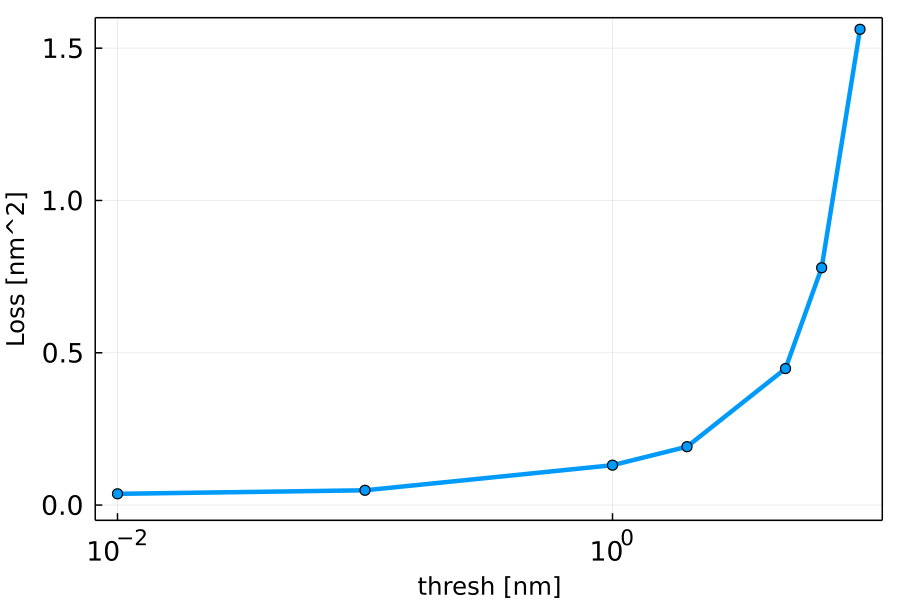

In [96]:
plot(T / 10.0, loss_array / 100.0, xaxis=:log, framestyle = :box, xlabel="threshold T", ylabel="loss [nm^2]", label=nothing, linewidth=3.0, markershape=:circle, dpi=150, fmt=:png, color=1,
     xtickfontsize=12, ytickfontsize=12, legendfontsize=12)

ylims!(-0.05, 1.6)
xlabel!("thresh [nm]", fontsize=35)
p = ylabel!("Loss [nm^2]", fontsize=35)

In [70]:
savefig(p, "blindtip_original01.png")

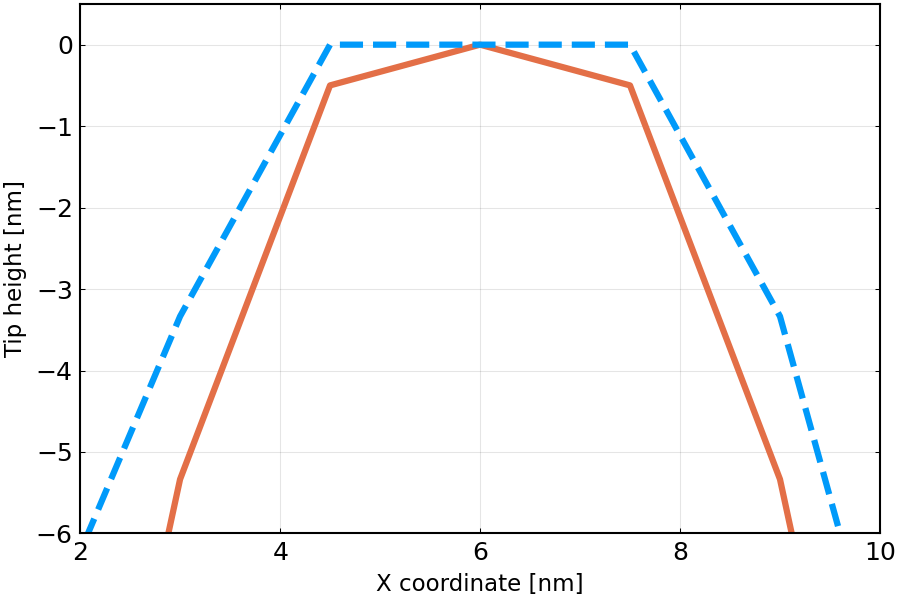

In [120]:
plot(collect(1:9) .* resolution / 10.0, tip[4, :] / 10.0, linewidth=3, label="ground truth", color=2,
     xtickfontsize=12, ytickfontsize=12, legendfontsize=12)
p = plot!(collect(1:9) .* resolution / 10.0, P_array[4][4, :] / 10.0, linewidth=3, label="reconstruction", color=1, framestyle = :box, linestyle=:dash, dpi=150, fmt=:png, legend=nothing)

ylims!((-6, 0.5))
xlims!((2, 10))
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Tip height [nm]", fontsize=35)

In [72]:
savefig(p, "blindtip_original02.png")

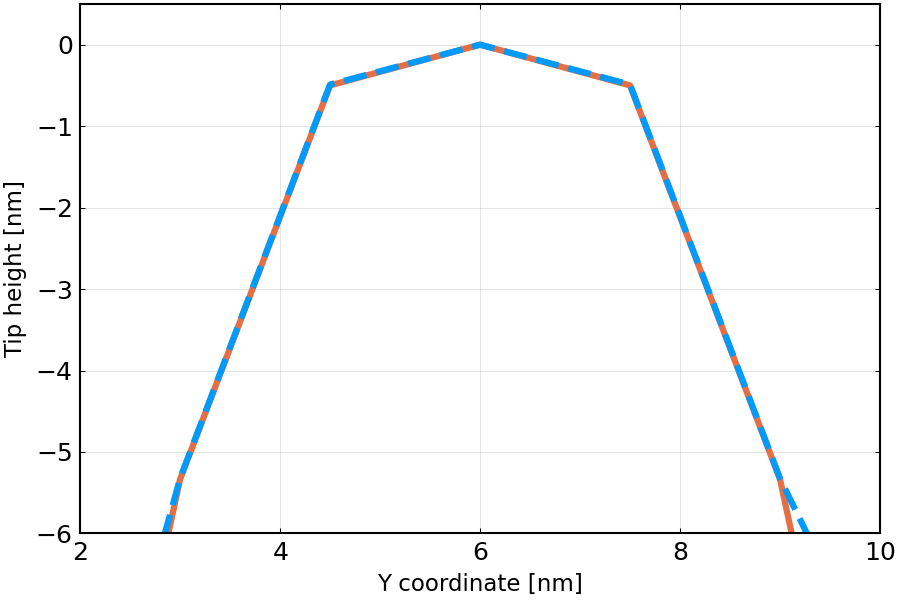

In [73]:
plot(collect(1:9) .* resolution / 10.0, tip[:, 4] / 10.0, linewidth=3, label="ground truth", color=2,
     xtickfontsize=12, ytickfontsize=12, legendfontsize=12)
p = plot!(collect(1:9) .* resolution / 10.0, P_array[1][:, 4] / 10.0, linewidth=3, color=1, label="reconstruction", framestyle = :box, linestyle=:dash, dpi=150, fmt=:png, legend=nothing)
ylims!((-6, 0.5))
xlims!((2, 10))
xlabel!("Y coordinate [nm]", fontsize=35)
ylabel!("Tip height [nm]", fontsize=35)

In [74]:
savefig(p, "blindtip_original03.png")

In [76]:
pyplot()

Plots.PyPlotBackend()

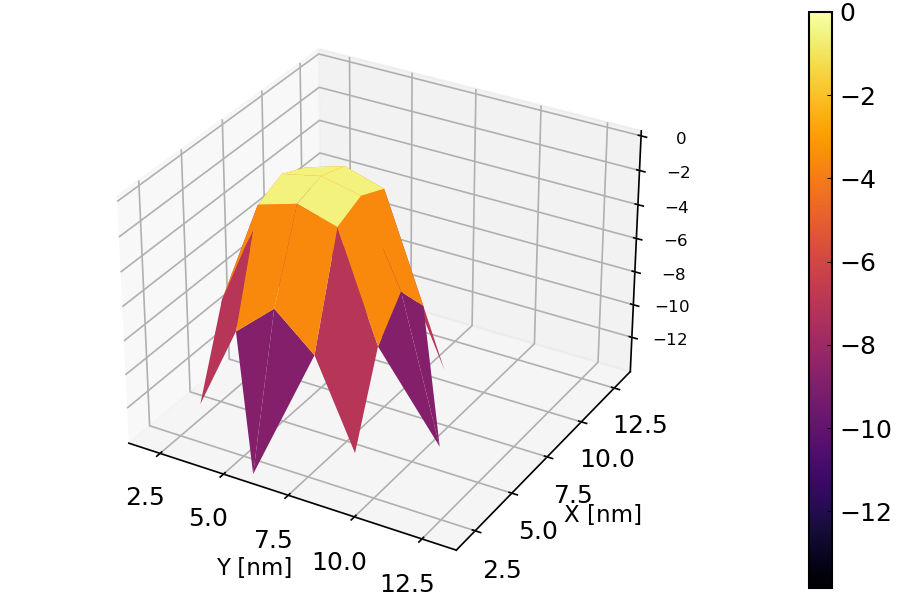

In [77]:
tip_tmp = deepcopy(tip)
tip_tmp[tip .< -150.0] .= NaN

plot(collect(1:9) .* resolution ./ 10.0, collect(1:9) .* resolution ./ 10.0, tip_tmp ./ 10.0, st=:surface, dpi=150,
     xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
xlabel!("Y [nm]", fontsize=35)
p = ylabel!("X [nm]", fontsize=35)
#zlabel!("Z [nm]", fontsize=35)
#zlims!((-8, 0.5))
#zlabel!("Tip height [nm]", fontsize=35)

In [78]:
savefig(p, "blindtip_original04.png")

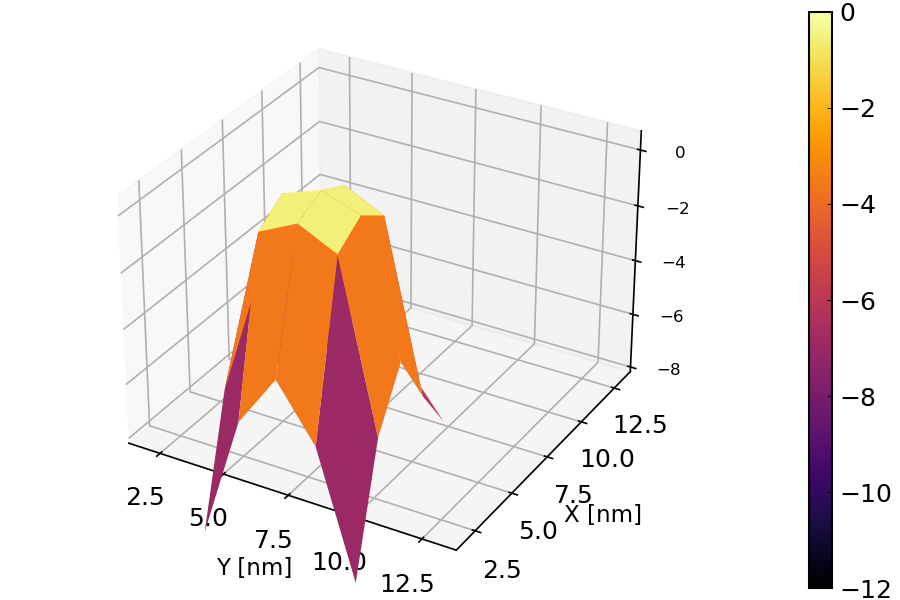

In [79]:
tip_tmp = deepcopy(P_array[1])
tip_tmp[tip .< -130.0] .= NaN

plot(collect(1:9) .* resolution ./ 10.0, collect(1:9) .* resolution ./ 10.0, tip_tmp ./ 10.0, st=:surface, dpi=150, clim=(-12, 0),
     xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
zlims!((-8, 0.5))
xlabel!("Y [nm]", fontsize=35)
p = ylabel!("X [nm]", fontsize=35)
#zlabel!("Tip height [nm]", fontsize=35)

In [80]:
savefig(p, "blindtip_original05.png")

In [81]:
gr()

Plots.GRBackend()

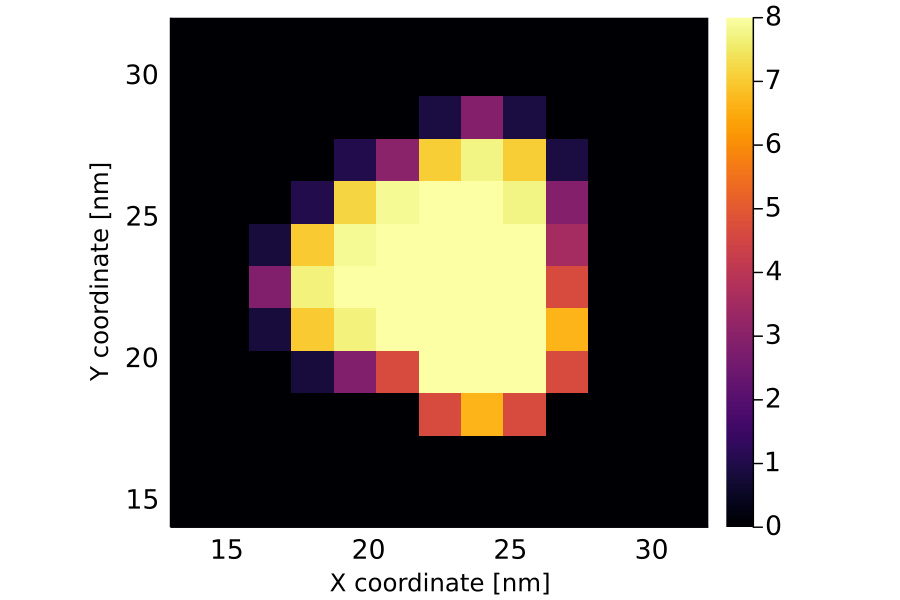

In [82]:
p = heatmap(collect(1:30) .* resolution / 10.0, collect(1:30) .* resolution / 10.0, images[1] / 10.0, clim=(0, 8), dpi=150, fmt=:png,
            aspect_ratio=:equal, xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
xlabel!("X coordinate [nm]", fontsize=35)
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Y coordinate [nm]", fontsize=35)
xlims!(13, 32)
ylims!(14, 32)

In [83]:
savefig(p, "blindtip_original06.png")

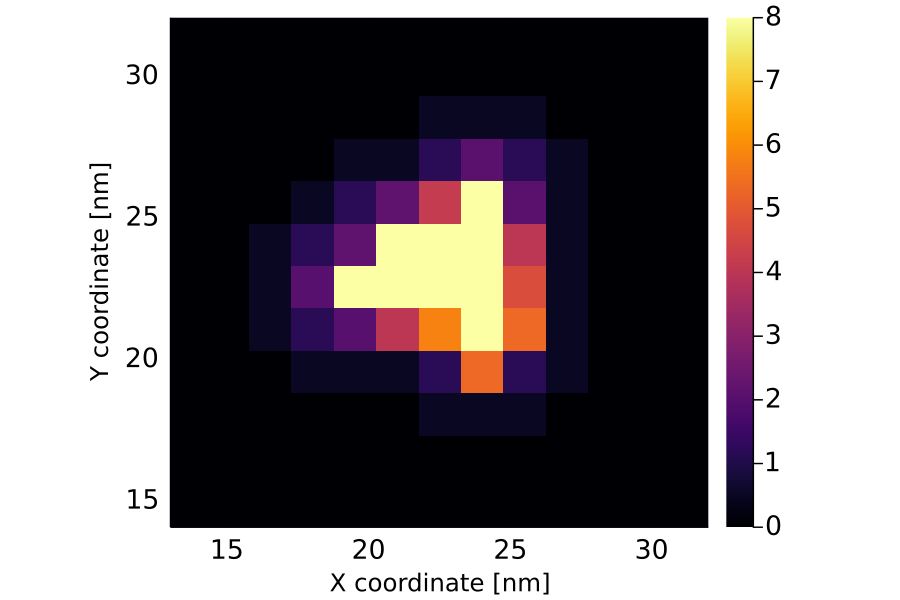

In [84]:
p = heatmap(collect(1:30) .* resolution / 10.0, collect(1:30) .* resolution / 10.0, ierosion(images[1], P_array[1]) / 10.0, clim=(0, 8), dpi=150, fmt=:png, aspect_ratio=:equal,
    xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Y coordinate [nm]", fontsize=35)
xlims!(13, 32)
ylims!(14, 32)

In [85]:
savefig(p, "blindtip_original07.png")

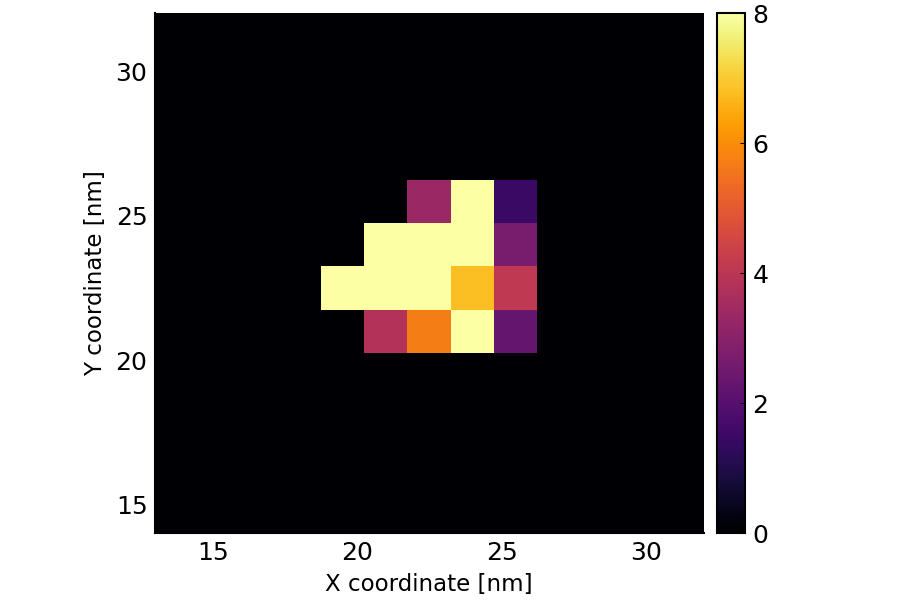

In [56]:
p = heatmap(collect(1:30) .* resolution / 10.0, collect(1:30) .* resolution / 10.0, surfs[1] / 10.0, clim=(0, 8), dpi=150, fmt=:png, aspect_ratio=:equal, 
            xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Y coordinate [nm]", fontsize=35)
xlims!(13, 32)
ylims!(14, 32)

In [58]:
savefig(p, "blindtip_original08.png")

# Correlations

In [123]:
crosscor(image1, image2) = mean((image1 .- mean(image1)) .* (image2 .- mean(image2))) / (std(image1) * std(image2))
#pixel_rmsd(image1, image2) = sqrt(mean((image1 .- image2).^2))

function pixel_rmsd(image1, image2; cutoff = -80.0)
    image1_shifted = similar(image1)

    rmsd_min = Inf64
    for du = -2:2, dv = -2:2
        image1_shifted = circshift(image1, (du, dv))
        id = (image1_shifted .> cutoff) .| (image2 .> cutoff)
        tmp = sqrt(mean((image1_shifted[id] .- image2[id]).^2))
        if tmp < rmsd_min
            rmsd_min = tmp
        end
    end
    return rmsd_min
end

diff_tip = zeros(Float64, length(T), 2)
count = 0
for it = 1:length(T)
    c = pixel_rmsd(tip, P_array[it])
    count += 1
    diff_tip[count, 1] = T[it]
    diff_tip[count, 2] = c
end

In [125]:
gr()

Plots.GRBackend()

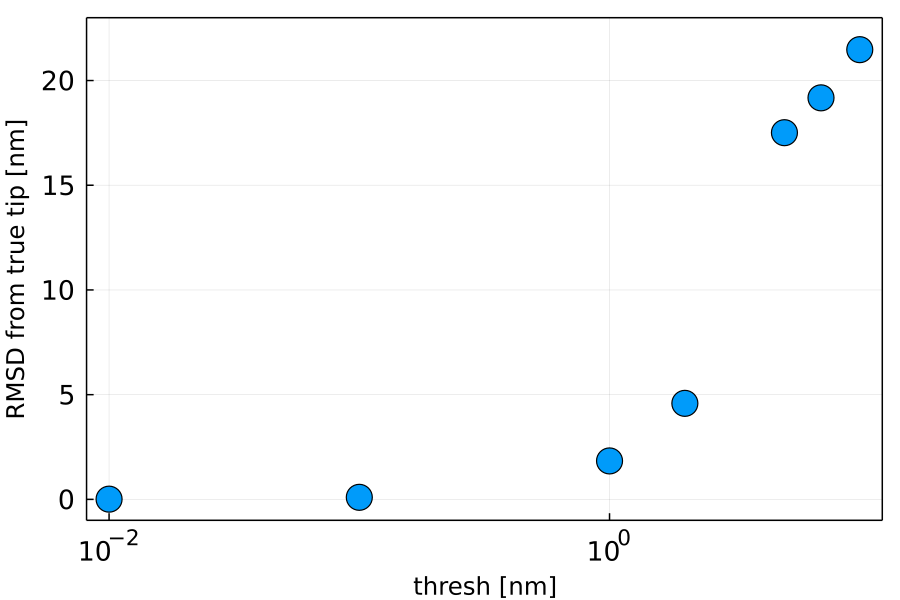

In [127]:
scatter(diff_tip[:, 1] / 10.0, diff_tip[:, 2] / 10.0, xaxis=:log, framestyle = :box, xlabel="threshold T", ylabel="RMSD frome true tip [nm]", label=nothing, linewidth=1.0, markershape=:circle, dpi=150, fmt=:png, color=1, 
        xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12, markersize=10, markerstrokewidth=1)
#ylims!(-0.05, 2.3)
xlabel!("thresh [nm]", fontsize=35)
p = ylabel!("RMSD from true tip [nm]", fontsize=35)
ylims!(-1, 23)

In [128]:
diff_surf = zeros(Float64, length(T)*length(images), 2)
count = 0

function pixel_rmsd(image1, image2; cutoff = 0.0)
    #id = (image1 .> cutoff) .| (image2 .> cutoff)

    rmsd_min = Inf64
    for du = -2:2, dv = -2:2
        image1_shifted = circshift(image1, (du, dv))
        id = (image1 .> cutoff) .| (image2 .> cutoff)
        tmp = sqrt(mean((image1_shifted[id] .- image2[id]).^2))
        if tmp < rmsd_min
            rmsd_min = tmp
        end
    end
    return rmsd_min
end

for it = 1:length(T)
    for iframe = 1:length(images)
        c = pixel_rmsd(surfs[iframe], ierosion(images[iframe], P_array[it]))
        count += 1
        diff_surf[count, 1] = T[it]
        diff_surf[count, 2] = c
    end
end

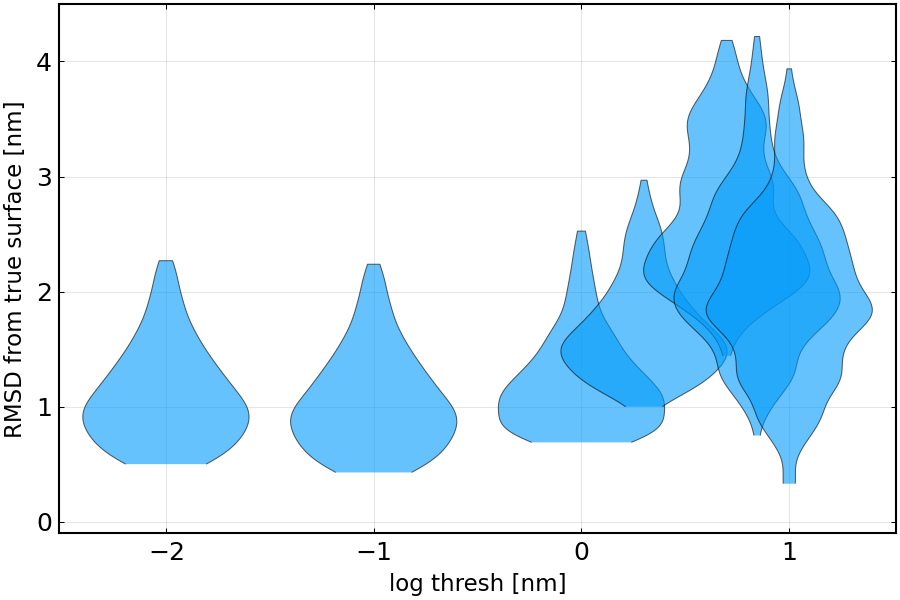

In [129]:
using StatsPlots
pyplot()

violin(log10.(diff_surf[:, 1] / 10.0), diff_surf[:, 2] / 10.0, ylim=(-0.1, 4.5),
       xtickfontsize=12, ytickfontsize=12, legendfontsize=12, 
       xlabel="log thresh [nm]", ylabel="RMSD from true surface [nm]", 
       framestyle=:box, label=nothing, linewidth=0.5, dpi=150, fmt=:png, alpha=0.6, color=1)

#ylims!(-0.1, 4.5)

# Save results

In [130]:
using BSON: @save, @load

@save "blindtip_original.bson" tip T P_array
@save "blindtip_original_rmsd.bson" diff_tip diff_surf